In [1]:
from dataset import XenoCantoData
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = XenoCantoData()

In [3]:
data.dataset.head(10)

,id,file_path,species,total_file_length,start,end
0,715013_0,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,0.0,240000.0
1,715013_1,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,240000.0,480000.0
2,715013_2,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,480000.0,720000.0
3,715013_3,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,720000.0,960000.0
4,715013_4,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,960000.0,1200000.0
5,715013_5,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,1200000.0,1440000.0
6,715013_6,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,1440000.0,1680000.0
7,715013_7,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,1680000.0,1920000.0
8,715013_8,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,1920000.0,2160000.0
9,715013_9,./dataset/audio/Linaria-cannabina/715013.mp3,linaria cannabina,280.141125,2160000.0,2400000.0


In [4]:
fs, a = data._read_audio("./dataset/audio/Columba-palumbus/653672.mp3")
a.shape

(1241636,)

In [5]:
file = 2

species, audio_buffer = data[file]
fs = metadata["fs"]
print(fs)
print(audio_buffer.shape)#

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
audio_length = 5 # in seconds

In [ ]:
print("Sound of channel 1")
ipd.Audio(audio_buffer, rate=fs)

In [ ]:
#audio_buffer = audio_buffer_full[:audio_length*fs, ] # only use channel 1 for now

In [ ]:
x_ticks = range(0, int(len(audio_buffer)/fs) + 1)
x_ticks_loc = [ x*fs for x in x_ticks]

plt.plot(audio_buffer)
x_ticks = [ str(x) + " s" for x in x_ticks ]
plt.xticks(x_ticks_loc, x_ticks)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
import numpy as np

frame_duration = 50 # milli seconds
frame_size = int(frame_duration / 1000 * fs)
start_frame = 0*fs

frame = audio_buffer[start_frame:start_frame+frame_size]
spectrum = np.fft.fft(frame)

abs_spec = np.abs(spectrum)
abs_spec = abs_spec[0:int(frame_size/2 + 1)]
freq = np.fft.rfftfreq(spectrum.shape[-1], d=1/fs)

plt.plot(freq, abs_spec)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
spec, fig = data.plot_spectrogram(audio_buffer, fs, frame_size, log_spectrogram=True)

In [ ]:
filtered_audio = data.reduce_noise(audio_buffer, fs)

In [ ]:
spec, fig = data.plot_spectrogram(filtered_audio, fs, frame_size, log_spectrogram=True)

In [ ]:
print("Filtered Audio")
ipd.Audio(filtered_audio, rate=fs)

In [6]:
import torch.utils.data as t_data

In [7]:
dataloader = t_data.DataLoader(data, num_workers=0, batch_size=1, shuffle=False)

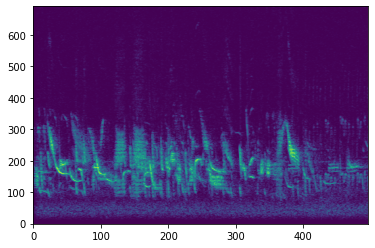

In [10]:
for label, images in dataloader:
    image = images[0]
    plt.imshow(image, origin='lower', aspect='auto')
    break